In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144865 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.23-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.23-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.23-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [2]:
!mkdir drive
!google-drive-ocamlfuse drive

import os 
os.chdir("/content/drive/Colab_Notebooks/11december")
!pwd

/content/drive/Colab_Notebooks/11december


In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [35]:
def get_image():

  pic= '/content/drive/Colab_Notebooks/11december/tower.jpg'


  im1 = Image.open(pic)      #orginal image
 

  im2 = cv.imread(pic)   #rgb changed image
  im3 = cv.Canny(im2, 100, 200)     #edges expressed image
  im4 = cv.Canny(im2, 100, 400)     #edges expressed image

  plt.subplot(141),plt.imshow(im1)
  plt.title('PIL Image'), plt.xticks([]), plt.yticks([])

  plt.subplot(142),plt.imshow(im2)
  plt.title('CV2 Image'), plt.xticks([]), plt.yticks([])

  plt.subplot(143),plt.imshow(im3,cmap = 'gray')
  plt.title('100vs200'), plt.xticks([]), plt.yticks([])

  plt.subplot(144),plt.imshow(im4,cmap = 'gray')
  plt.title('100vs400'), plt.xticks([]), plt.yticks([])

  plt.show()

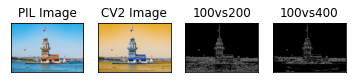

In [36]:
get_image()